In [490]:
#needed libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score , mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load Orange data:

In [491]:
orange = pd.read_csv("/kaggle/input/orange-quality/Orange Quality Data.csv")

## show the orange data:

In [492]:
orange.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


# Cleaning data:
- check for null and duplicated values  

In [493]:
orange.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 241 entries, 0 to 240

Data columns (total 11 columns):

 #   Column              Non-Null Count  Dtype  

---  ------              --------------  -----  

 0   Size (cm)           241 non-null    float64

 1   Weight (g)          241 non-null    int64  

 2   Brix (Sweetness)    241 non-null    float64

 3   pH (Acidity)        241 non-null    float64

 4   Softness (1-5)      241 non-null    float64

 5   HarvestTime (days)  241 non-null    int64  

 6   Ripeness (1-5)      241 non-null    float64

 7   Color               241 non-null    object 

 8   Variety             241 non-null    object 

 9   Blemishes (Y/N)     241 non-null    object 

 10  Quality (1-5)       241 non-null    float64

dtypes: float64(6), int64(2), object(3)

memory usage: 20.8+ KB


In [494]:
orange.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [495]:
orange.duplicated().sum()

0

## Show the statical information for each numeric column:

In [496]:
orange.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


# EDA of the data 

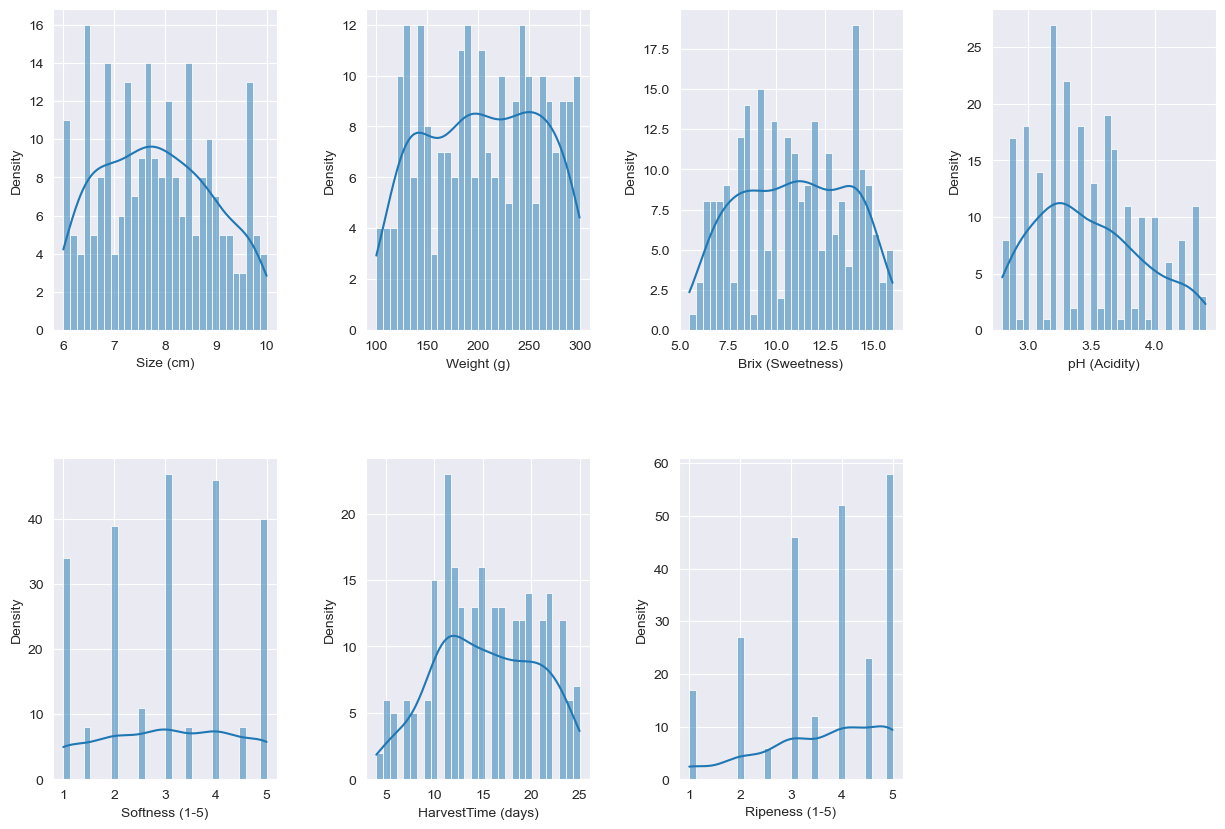

In [497]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))  
columns = orange.columns[0:7]

for i, column in enumerate(columns):
    ax = axes[i // 4, i % 4]
    sns.histplot(orange[column], bins=30, kde=True, ax=ax) 
    ax.set_xlabel(column)
    ax.set_ylabel('Density') 

# Hide empty subplots
for i in range(len(columns), 2 * 4):
    fig.delaxes(axes.flatten()[i])

plt.subplots_adjust(wspace=0.4, hspace=0.4)  
plt.show()


In [498]:
# Calculate skewness for each column
for column in orange.select_dtypes(include=[np.number]).columns:
    skewness_per_column = orange[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for Size (cm): 0.15456311300244854

Skewness for Weight (g): -0.048941969729031316

Skewness for Brix (Sweetness): -0.03406710137449985

Skewness for pH (Acidity): 0.37927481481253217

Skewness for Softness (1-5): -0.06715482184658936

Skewness for HarvestTime (days): -0.04045902298553126

Skewness for Ripeness (1-5): -0.5943341606203865

Skewness for Quality (1-5): -0.9338634693931638


In [499]:
orange.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


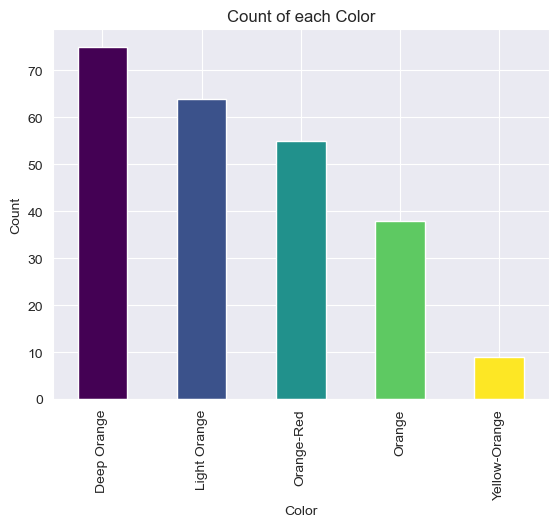

In [500]:
Color_counts = orange['Color'].value_counts()
num_varieties = len(Color_counts)
colors = plt.cm.viridis(np.linspace(0, 1, num_varieties))
Color_counts.plot(kind='bar', color=colors)

plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Count of each Color')

plt.show()


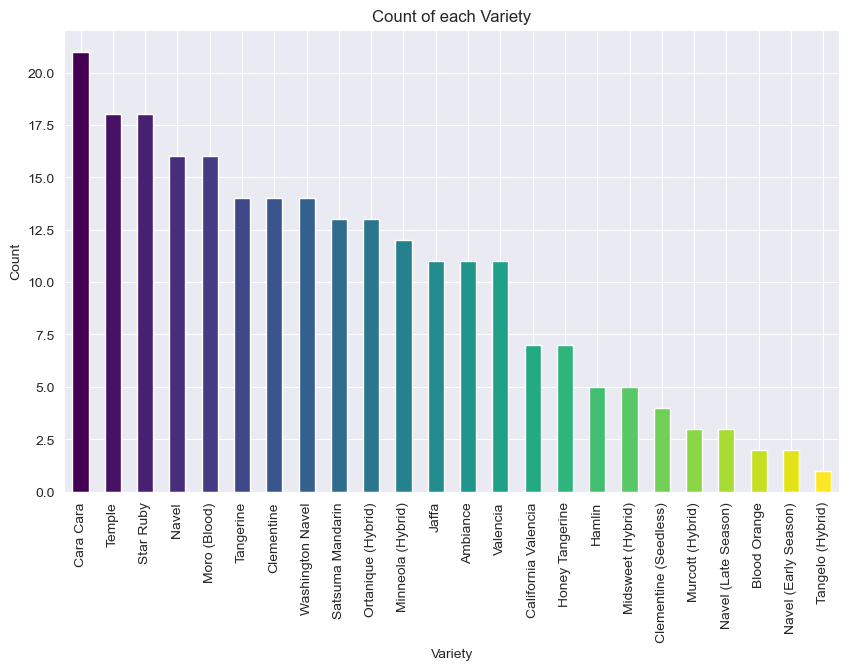

In [501]:
variety_counts = orange['Variety'].value_counts()
num_varieties = len(variety_counts)
colors = plt.cm.viridis(np.linspace(0, 1, num_varieties))
plt.figure(figsize=(10,6))
variety_counts.plot(kind='bar', color=colors)

plt.xlabel('Variety')
plt.ylabel('Count')
plt.title('Count of each Variety')

plt.show()


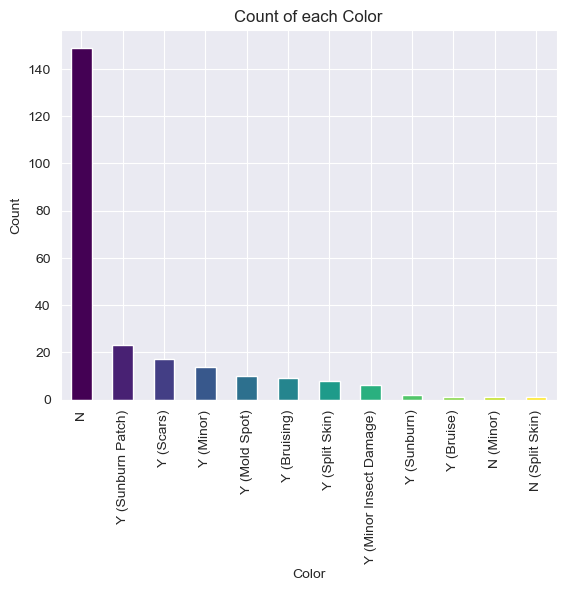

In [502]:
Color_counts = orange['Blemishes (Y/N)'].value_counts()

num_varieties = len(Color_counts)
colors = plt.cm.viridis(np.linspace(0, 1, num_varieties))
Color_counts.plot(kind='bar', color=colors)

plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Count of each Color')

plt.show()


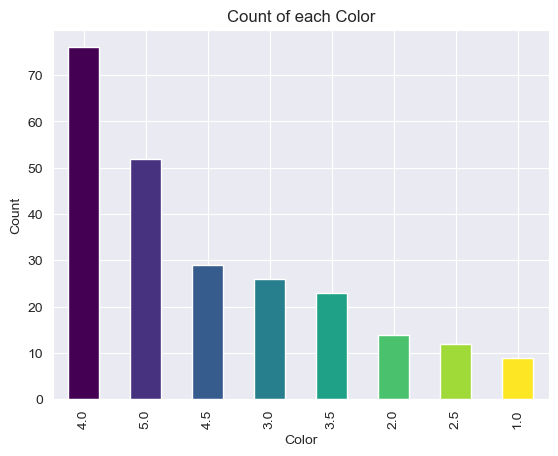

In [504]:
Color_counts = orange['Quality (1-5)'].value_counts()
num_varieties = len(Color_counts)
colors = plt.cm.viridis(np.linspace(0, 1, num_varieties))
Color_counts.plot(kind='bar', color=colors)

plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Count of each Color')

plt.show()


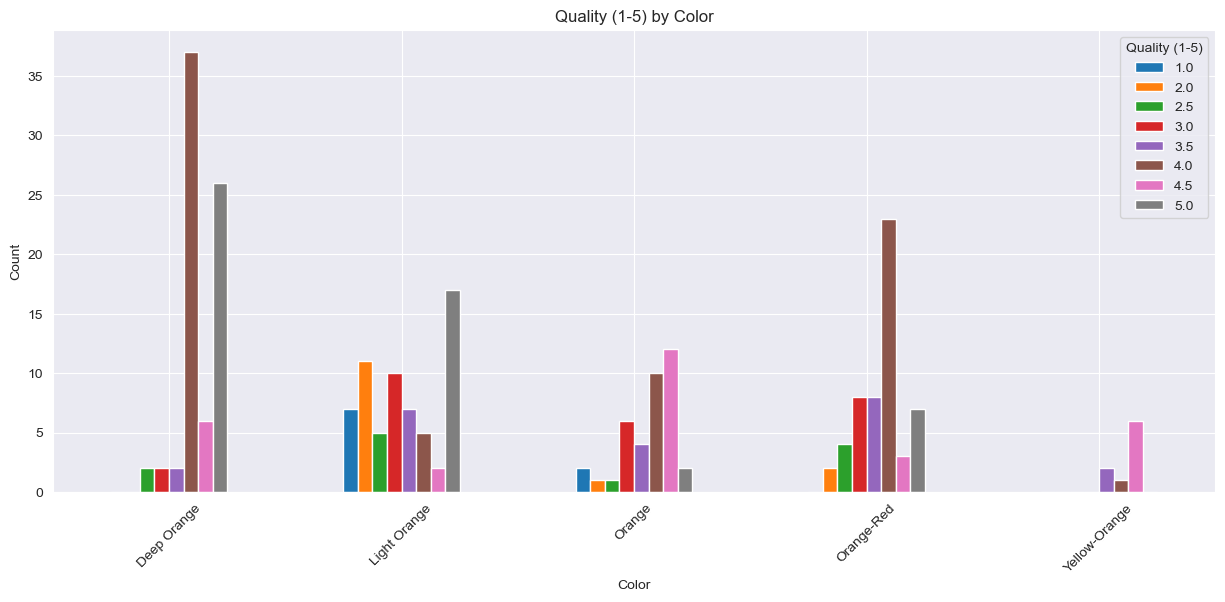

In [505]:
quality_size = pd.crosstab(orange['Color'], orange['Quality (1-5)'])
ax = quality_size.plot(kind='bar', figsize=(15, 6))
ax.set_xticklabels(quality_size.index, rotation=45)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Quality (1-5) by Color')

plt.show()


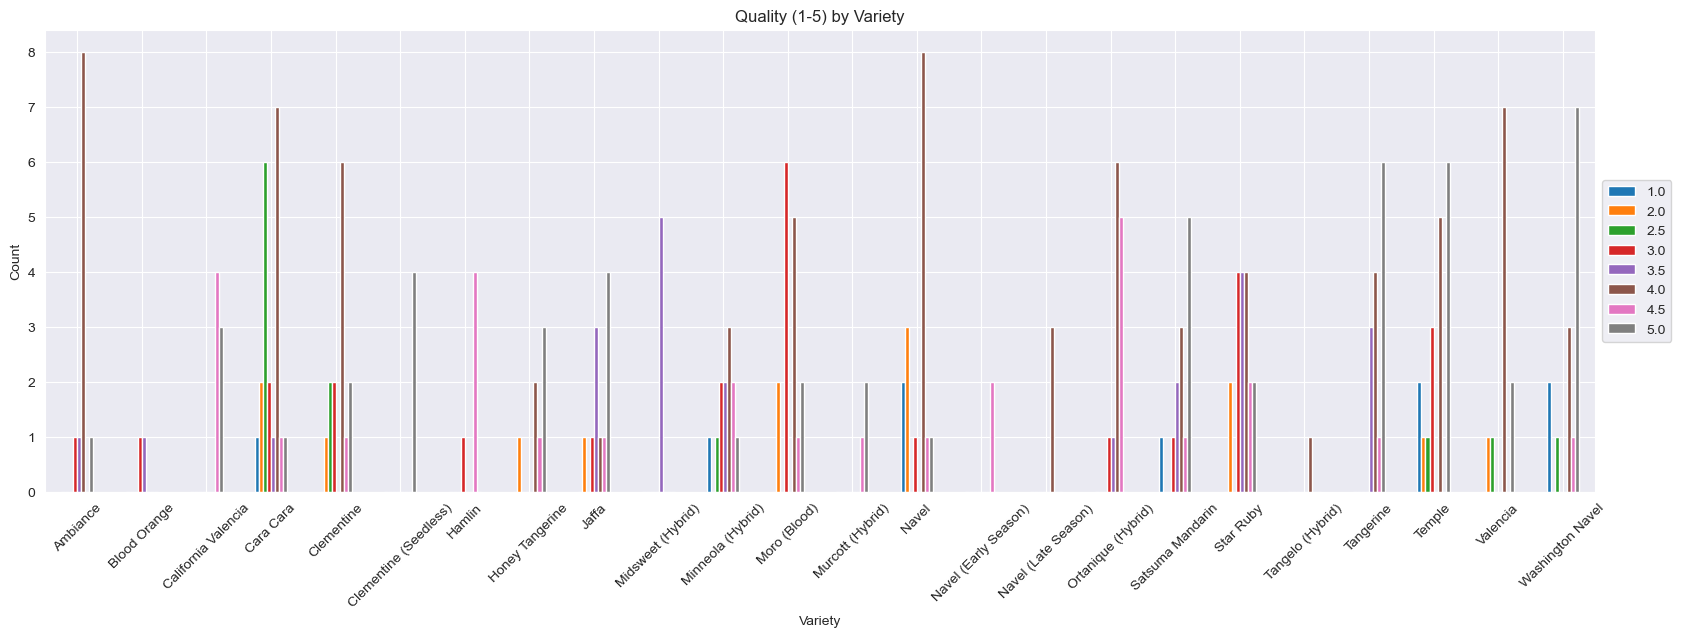

In [506]:
quality_size = pd.crosstab(orange['Variety'], orange['Quality (1-5)'])
ax = quality_size.plot(kind='bar', figsize=(20, 6))
ax.set_xticklabels(quality_size.index, rotation=45)

plt.xlabel('Variety')
plt.ylabel('Count')
plt.title('Quality (1-5) by Variety')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


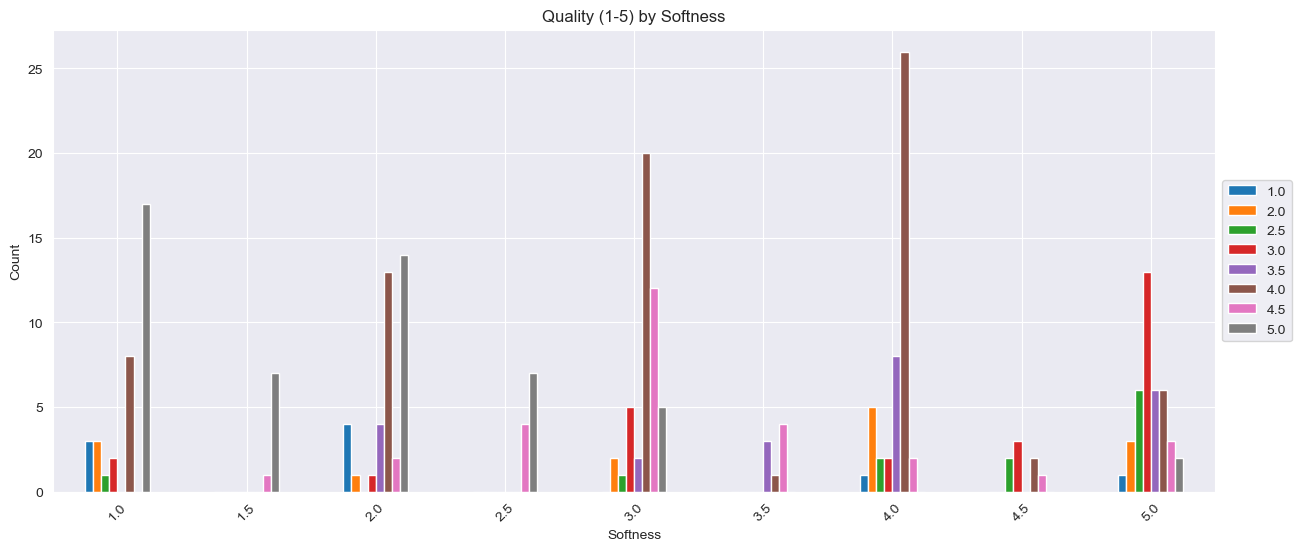

In [507]:
quality_size = pd.crosstab(orange['Softness (1-5)'], orange['Quality (1-5)'])
ax = quality_size.plot(kind='bar', figsize=(15, 6))

ax.set_xticklabels(quality_size.index, rotation=45)

plt.xlabel('Softness')
plt.ylabel('Count')
plt.title('Quality (1-5) by Softness')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

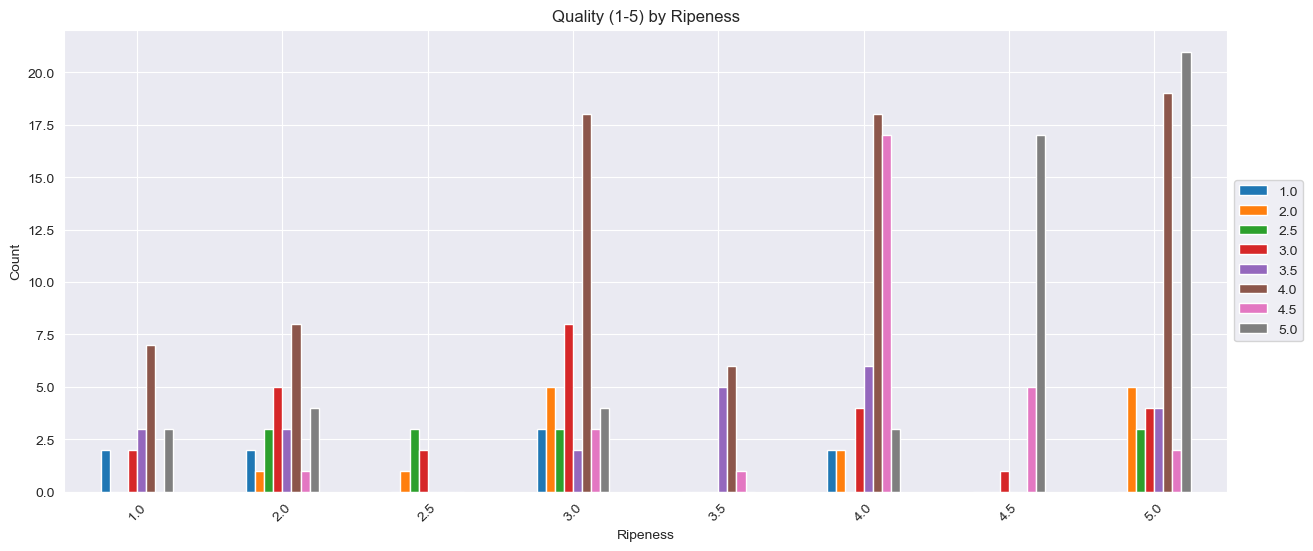

In [508]:
quality_size = pd.crosstab(orange['Ripeness (1-5)'], orange['Quality (1-5)'])
ax = quality_size.plot(kind='bar', figsize=(15, 6))

ax.set_xticklabels(quality_size.index, rotation=45)

plt.xlabel('Ripeness')
plt.ylabel('Count')
plt.title('Quality (1-5) by Ripeness')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


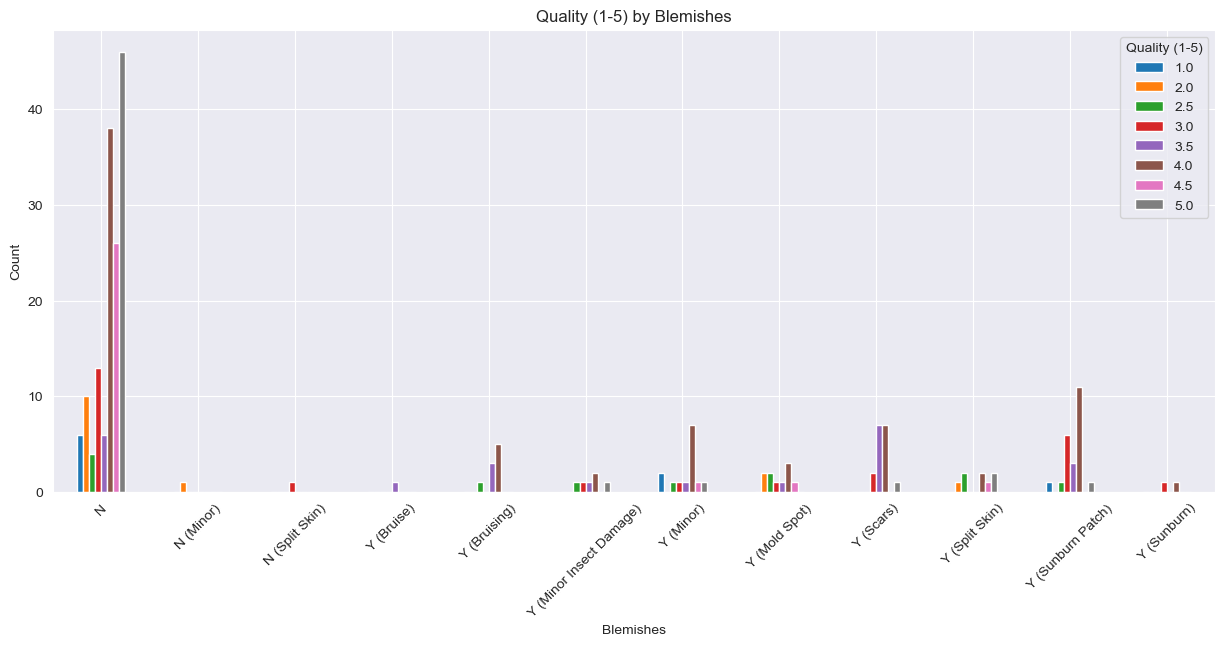

In [509]:
quality_size = pd.crosstab(orange['Blemishes (Y/N)'], orange['Quality (1-5)'])
ax = quality_size.plot(kind='bar', figsize=(15, 6))
ax.set_xticklabels(quality_size.index, rotation=45)

plt.xlabel('Blemishes')
plt.ylabel('Count')
plt.title('Quality (1-5) by Blemishes')

plt.show()


                    Size (cm)  Weight (g)  Brix (Sweetness)  pH (Acidity)  \

Size (cm)            1.000000    0.305348         -0.305865      0.330487   

Weight (g)           0.305348    1.000000         -0.239659      0.303806   

Brix (Sweetness)    -0.305865   -0.239659          1.000000     -0.300080   

pH (Acidity)         0.330487    0.303806         -0.300080      1.000000   

Softness (1-5)       0.236863    0.316806         -0.344376      0.360222   

HarvestTime (days)   0.313330    0.374670         -0.329862      0.262461   

Ripeness (1-5)      -0.256665   -0.260454          0.144666     -0.232627   

Quality (1-5)       -0.243113   -0.330268          0.631343     -0.321942   



                    Softness (1-5)  HarvestTime (days)  Ripeness (1-5)  \

Size (cm)                 0.236863            0.313330       -0.256665   

Weight (g)                0.316806            0.374670       -0.260454   

Brix (Sweetness)         -0.344376           -0.329862        0.144666 

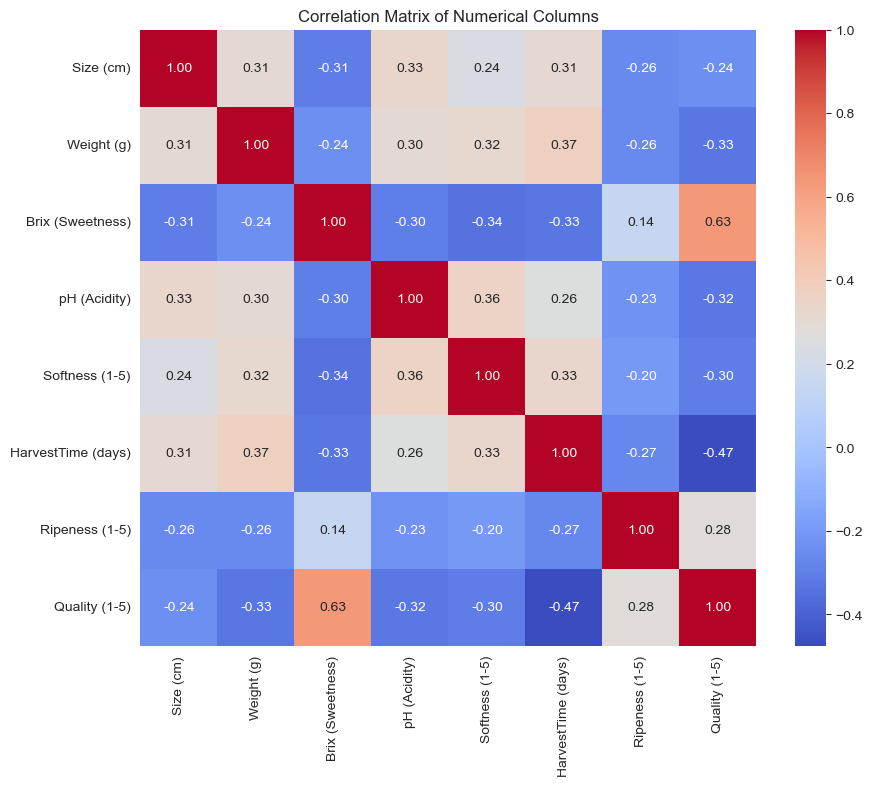

In [510]:
numerical_columns = orange.select_dtypes(include='number')

correlation_matrix = numerical_columns.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

- preparing data for the prediction:

In [511]:
categorical_features = ['Color', 'Variety','Blemishes (Y/N)']
label_encoder = LabelEncoder()
for feature in categorical_features:
    orange[feature] = label_encoder.fit_transform(orange[feature])

In [512]:
X=orange.drop('Quality (1-5)',axis=1)
y=orange['Quality (1-5)']


print("Type of y:", type(y))
print("Unique values in y:", np.unique(y))


Type of y: <class 'pandas.core.series.Series'>

Unique values in y: [1.  2.  2.5 3.  3.5 4.  4.5 5. ]


In [513]:
thresholds = [1.5,2.5, 3.5, 4.5]

y_discrete = np.digitize(y, bins=thresholds)

- Split the data

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

- Add normalization:

In [515]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling:

- Random forest model:

In [516]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)
rf_preds = random_forest.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_preds)
mse=mse = mean_squared_error(y_test, rf_preds)** 0.5
print("Random Forest Accuracy:", rf_accuracy)
print("MSE:", mse)

Random Forest Accuracy: 0.7346938775510204

MSE: 0.6226998490772391


- Xg-boost model:

In [517]:
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train_scaled, y_train)
xgboost_preds = xgboost_model.predict(X_test_scaled)
xgboost_accuracy = accuracy_score(y_test, xgboost_preds)
mse=mse = mean_squared_error(y_test, xgboost_preds)** 0.5
print("XGBoost Accuracy:", xgboost_accuracy)
print("MSE:", mse)

XGBoost Accuracy: 0.6326530612244898

MSE: 0.8806305718527109


- Knn model

In [518]:
knn_classifier = KNeighborsClassifier(n_neighbors=5) 
knn_classifier.fit(X_train_scaled, y_train)
knn_preds = knn_classifier.predict(X_test_scaled)
mse=mse = mean_squared_error(y_test, knn_preds)** 0.5
knn_accuracy = accuracy_score(y_test, knn_preds)
print("KNN Accuracy:", knn_accuracy)
print("XGBoost Accuracy:", xgboost_accuracy)

KNN Accuracy: 0.6938775510204082

XGBoost Accuracy: 0.6326530612244898
